In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
phishing_df = pd.read_csv('dataset_phishing.csv')

In [3]:
url_features = phishing_df.columns[1:55]
label = phishing_df['status'] 

# Only use features from dataset related to url
phishing_df = phishing_df[url_features]
phishing_df['status'] = label
phishing_df.drop(columns=['nb_redirection', 'nb_external_redirection'], inplace=True) # issues with requests
phishing_df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,status
0,37,19,0,3,0,0,0,0,0,0,...,11,6,5.750000,7.0,4.500000,0,0,0,0,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,19,32,15.750000,19.0,14.666667,0,0,0,0,phishing
2,126,50,1,4,1,0,1,2,0,3,...,13,17,8.250000,8.4,8.142857,0,0,0,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,5,0,5.000000,5.0,0.000000,0,0,0,0,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,7,11,6.333333,5.0,7.000000,0,0,0,0,legitimate


### Exploring the Data

In [4]:
phishing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   length_url          11430 non-null  int64  
 1   length_hostname     11430 non-null  int64  
 2   ip                  11430 non-null  int64  
 3   nb_dots             11430 non-null  int64  
 4   nb_hyphens          11430 non-null  int64  
 5   nb_at               11430 non-null  int64  
 6   nb_qm               11430 non-null  int64  
 7   nb_and              11430 non-null  int64  
 8   nb_or               11430 non-null  int64  
 9   nb_eq               11430 non-null  int64  
 10  nb_underscore       11430 non-null  int64  
 11  nb_tilde            11430 non-null  int64  
 12  nb_percent          11430 non-null  int64  
 13  nb_slash            11430 non-null  int64  
 14  nb_star             11430 non-null  int64  
 15  nb_colon            11430 non-null  int64  
 16  nb_c

In [5]:
phishing_df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,9.000000,7.000000,0.000000,5.250000,5.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,11.000000,10.000000,7.000000,6.500000,7.000000,4.857143,0.000000,0.000000,0.000000,0.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,16.000000,13.000000,11.000000,8.000000,9.000000,6.714286,0.000000,0.000000,0.000000,0.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,829.000000,62.000000,829.000000,128.250000,39.000000,250.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
phishing_df['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

In [7]:
phishing_df['status'].replace(['legitimate', 'phishing'], [0, 1], inplace=True)

There is an equal number of legitimate and phishing links present in the dataset.

In [8]:
from sklearn.feature_selection import mutual_info_classif

In [9]:
X = phishing_df.drop(columns = ['status'])
y = phishing_df['status']

In [10]:
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
mi_series

longest_word_path     0.109223
nb_www                0.107619
ratio_digits_url      0.100843
char_repeat           0.086647
phish_hints           0.082016
avg_word_path         0.080706
longest_words_raw     0.078780
shortest_word_host    0.076954
avg_word_host         0.076805
length_url            0.072517
avg_words_raw         0.069300
length_hostname       0.067631
nb_dots               0.061002
shortest_words_raw    0.056029
nb_qm                 0.054552
ip                    0.053915
nb_eq                 0.051563
ratio_digits_host     0.050555
length_words_raw      0.041519
shortest_word_path    0.038392
nb_subdomains         0.036765
nb_slash              0.036401
nb_hyphens            0.030864
prefix_suffix         0.029073
tld_in_subdomain      0.028831
nb_and                0.023334
longest_word_host     0.022634
nb_semicolumn         0.021679
nb_at                 0.017347
nb_com                0.013044
nb_or                 0.011837
nb_percent            0.010805
nb_under

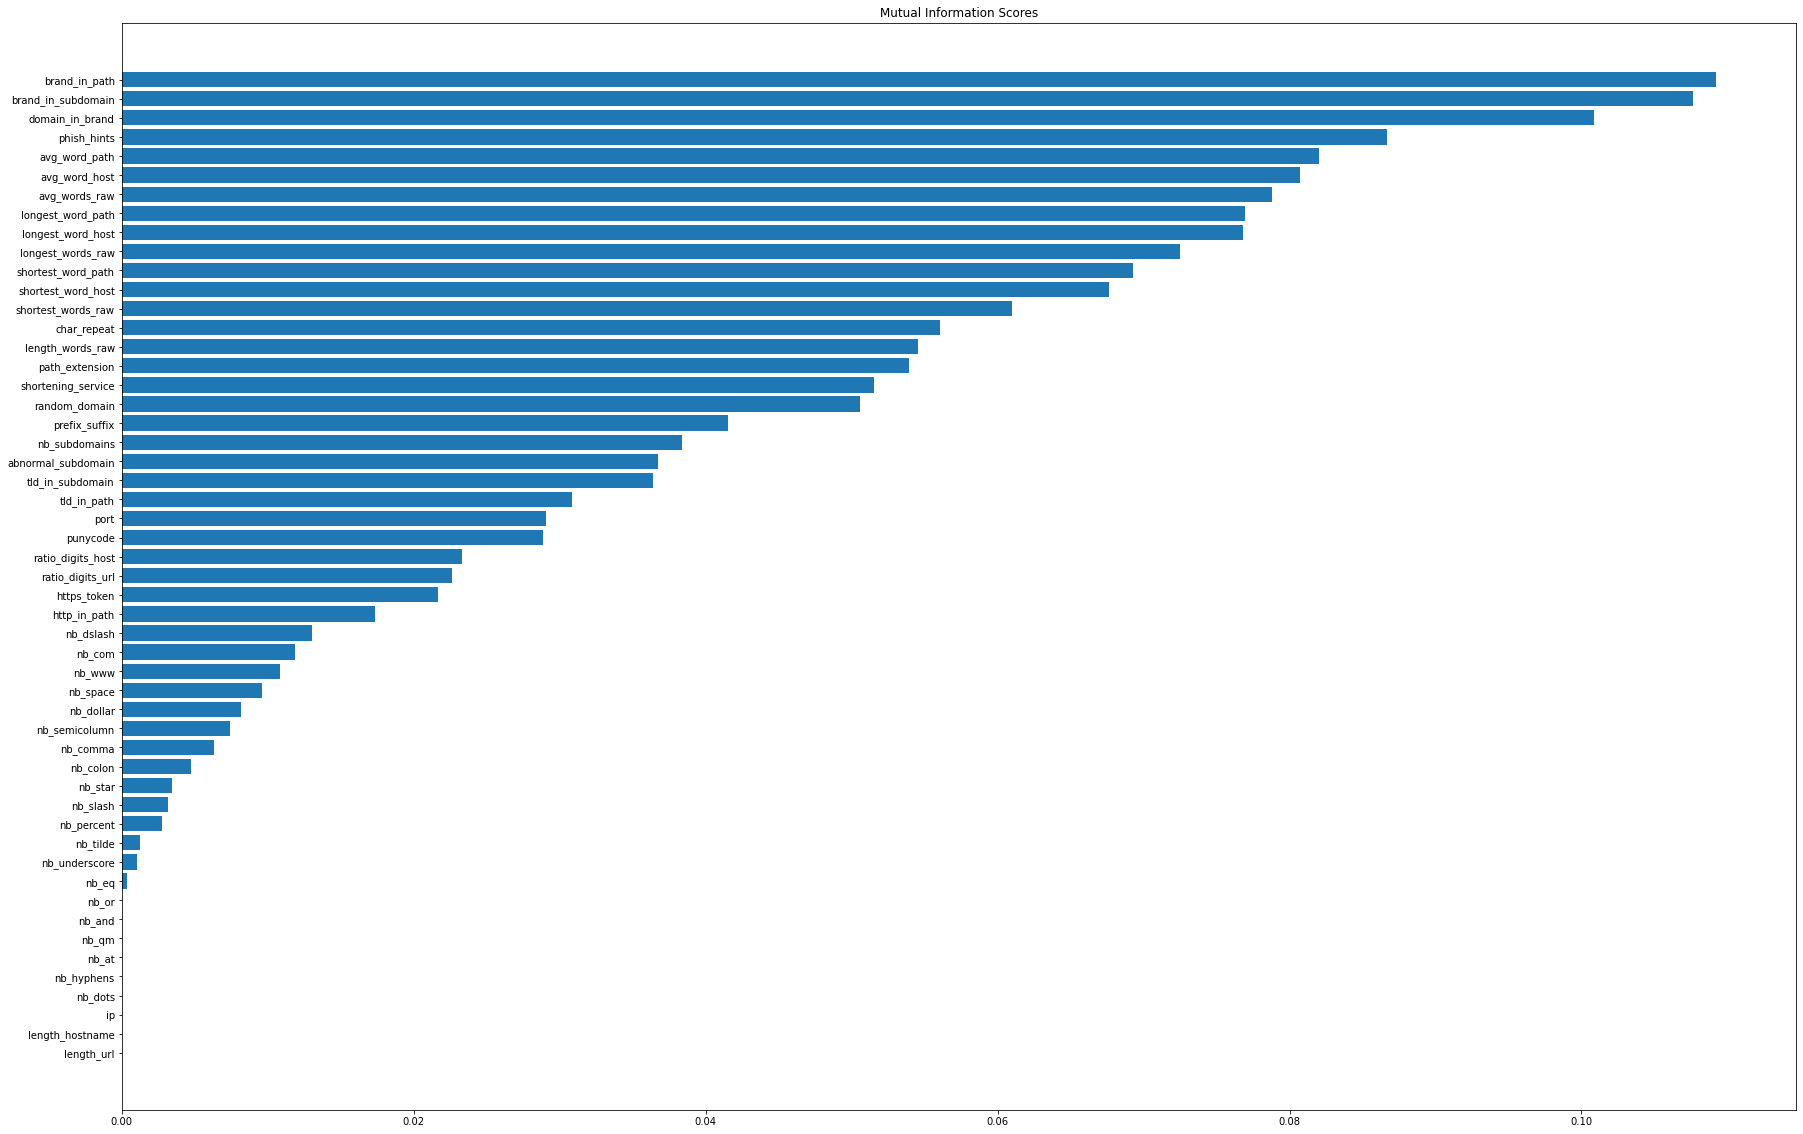

In [11]:
width = np.arange(len(mi_scores))

plt.figure(figsize=(30, 20))
plt.barh(width, np.sort(mi_scores))
plt.yticks(width, X.columns)
plt.title("Mutual Information Scores")

plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
def train_rfc(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    rfc = RandomForestClassifier(n_estimators=200, random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test)
    
    return accuracy, precision, recall, f1

In [14]:
n = np.count_nonzero(mi_scores)
features = mi_series.index.to_numpy()

y = phishing_df['status']
scores = []

for i in range(10, n, 1):
    top_n_features = features[:i]
    X = phishing_df[top_n_features]
    
    accuracy, precision, recall, f1 = train_rfc(X, y)
    scores.append([i, accuracy, precision, recall, f1])

In [15]:
results = pd.DataFrame(scores, columns=['num_features', 'accuracy', 'precision', 'recall', 'f1-score'])
results

,num_features,accuracy,precision,recall,f1-score
0,10,0.854794,0.839636,0.865704,0.852471
1,11,0.848495,0.831232,0.860769,0.845743
2,12,0.857243,0.845238,0.865854,0.855422
3,13,0.875087,0.866947,0.881139,0.873985
4,14,0.874388,0.869048,0.878273,0.873636
5,15,0.876487,0.870448,0.880936,0.875660
6,16,0.876137,0.866947,0.883024,0.874912
7,17,0.877537,0.869748,0.883357,0.876500
8,18,0.874038,0.868347,0.878187,0.873239
9,19,0.879986,0.873950,0.884479,0.879183


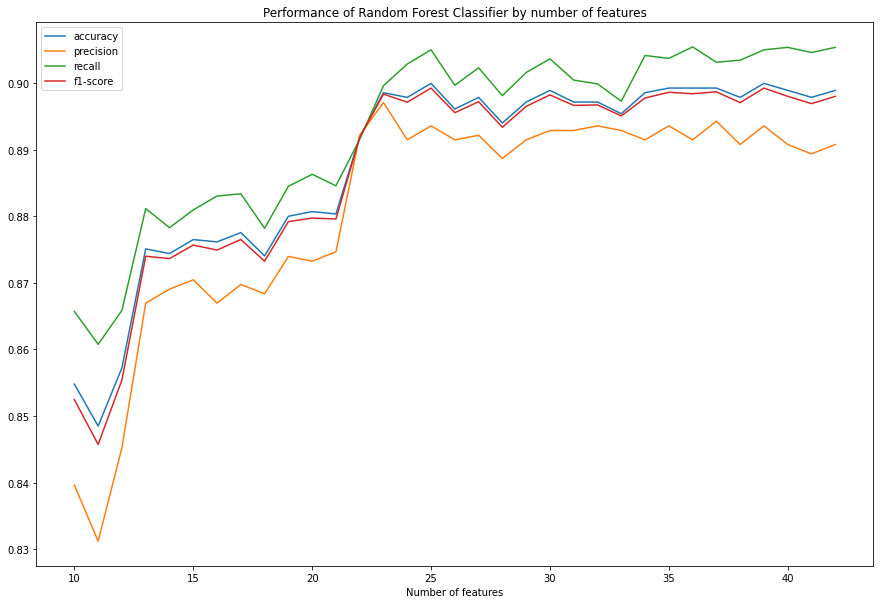

In [16]:
plt.figure(figsize=(15, 10))
plt.plot(results['num_features'], results['accuracy'], label='accuracy')
plt.plot(results['num_features'], results['precision'], label='precision')
plt.plot(results['num_features'], results['recall'], label='recall')
plt.plot(results['num_features'], results['f1-score'], label='f1-score')

plt.title('Performance of Random Forest Classifier by number of features')
plt.xlabel('Number of features')
plt.legend()
plt.show()

In [27]:
np.argwhere(results['accuracy'].to_numpy() == np.amax(results['accuracy'].to_numpy())).flatten()

array([15, 29])

In [28]:
np.argwhere(results['f1-score'].to_numpy() == np.amax(results['f1-score'].to_numpy())).flatten()

array([15, 29])

In [29]:
best_n = results['num_features'][29]
best_n

39

In [30]:
X = phishing_df[features[:best_n]]
y = phishing_df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
rfc = RandomForestClassifier(n_estimators=200, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [31]:
print(f'accuracy: {accuracy_score(y_pred, y_test)}')
print(classification_report(y_test, y_pred))

accuracy: 0.8999300209937019
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1430
           1       0.90      0.89      0.90      1428

    accuracy                           0.90      2858
   macro avg       0.90      0.90      0.90      2858
weighted avg       0.90      0.90      0.90      2858



In [32]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [33]:
# save best features for later
with open('features.pkl', 'wb') as f:
    pickle.dump(features[:best_n], f)